In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
SAVE_FIGURES = False
RESULTS_DIR = './results_paper'

In [3]:
EXPERIMENT = 'pairwise_power'

tag = '_paper'

df = pd.read_csv(f'{RESULTS_DIR}/{EXPERIMENT}_results{tag}.csv', sep=',', engine='python')

In [4]:
print('NA precisions: ', np.sum(1-df['Precision'].notna()))
df = df.loc[df['Precision'].notna(), :]

df['Fraction of shifting mechanisms'] = df['sparsity'] / df['n_variables']

df['F1'] = 2 * df['Recall'] * df['Precision'] / (df['Recall'] + df['Precision'])

x_var_rename_dict = {
    'sample_size': '# Samples',
    'Number of environments': '# Environments',
    'Fraction of shifting mechanisms': 'Shift fraction',
    'dag_density': 'Edge density',
    'n_variables': '# Variables',
}

plot_df = df.rename(
        x_var_rename_dict, axis=1
    ).rename(
        {'Method': r'$\bf{Test}$', 'Soft': r'$\bf{Score}$'}, axis=1
    ).replace(
        {
            'er': 'Erdos-Renyi',
            'ba': 'Hub',
            'PC (pool all)': 'Full PC (oracle)',
            'Full PC (KCI)': r'Pooled PC (KCI) [25]',
            'Min changes (oracle)': 'MSS (oracle)',
            'Min changes (KCI)': 'MSS (KCI)',
            'Min changes (GAM)': 'MSS (GAM)',
            'Min changes (Linear)': 'MSS (Linear)',
            'Min changes (FisherZ)': 'MSS (FisherZ)',
            'MC': r'MC [11]',
            False: 'Hard',
            True: 'Soft',
        }
)

NA precisions:  0


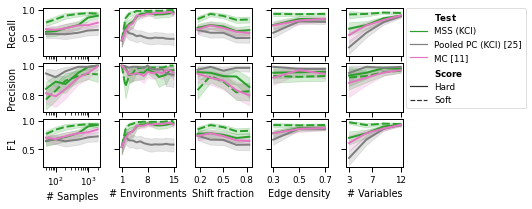

In [5]:
sns.set_context('paper')

grid_vars = list(x_var_rename_dict.values())
metrics = ['Recall', 'Precision', 'F1']

n_settings = [5, 3, 4, 6, 1]

indices = [
    (a, b) for a, b in zip(np.cumsum([0] + n_settings)[:-1], np.cumsum(n_settings))
]
indices = indices[-2:] + indices[:-2]

fig, axes = plt.subplots(
    len(metrics),
    len(grid_vars),
    sharey='row', sharex='col',
    figsize=(1.5*len(grid_vars), 3)
)

for row, metric in zip(axes, metrics):
    for g_var, (lb, ub), ax in zip(grid_vars, indices, row):
        plot_df_ax = plot_df[
                (plot_df['params_index'] >= lb)
                & (plot_df['params_index'] < ub)
                & (~plot_df[r'$\bf{Test}$'].isin([
                    'Full PC (oracle)',
                    'MSS (oracle)',
                    'MSS (GAM)',
                    'MSS (FisherZ)',
                    'MSS (Linear)'
                ]))
            ]
        plot_df_ax = pd.concat(
            (
                plot_df_ax[plot_df_ax[r'$\bf{Score}$'] == 'Hard'],
                plot_df_ax[(plot_df_ax[r'$\bf{Score}$'] == 'Soft') & (plot_df_ax[r'$\bf{Test}$'] == 'MSS (KCI)')]
            ),
            ignore_index=True
        )
        
        if g_var != '# Environments':
            plot_df_ax = plot_df_ax[
                # IMPORTANT! otherwise average over all number of environments
                plot_df_ax['# Environments'] == plot_df_ax['# Environments'].max()
            ]

        sns.lineplot(
            data=plot_df_ax,
            x=g_var,
            y=metric,
            hue=r'$\bf{Test}$',
            style=r'$\bf{Score}$',
            ax=ax,
            palette=[
                sns.color_palette("tab10")[i]
                for i in [2, 7, 6]
            ],
            legend='full',
            style_order=['Hard', 'Soft'],
            lw=2,
        )
        
        xmin = plot_df_ax[g_var].min()
        xmax = plot_df_ax[g_var].max()
        if xmax > 1:
            ax.set_xticks([
                xmin,
                int(xmin + (xmax - xmin) / 2),
                xmax,
            ])
        else:
            ax.set_xticks([
                np.round(xmin, 1),
                np.round(xmin + (xmax - xmin) / 2 , 1),
                np.round(xmax, 1),
            ])

leg_idx = 4

axes = np.concatenate(axes)

for i in range(len(axes)):
    if i == 0:
        axes[i].set_xscale('log')
    if i == leg_idx:
        axes[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.setp(axes[i].get_legend().get_title(), fontsize=22)
    else:
        try:
            axes[i].get_legend().remove()
        except:
            pass

plt.tight_layout()
plt.subplots_adjust(hspace=0.15)
if SAVE_FIGURES:
    plt.savefig(f'./figures/empirical_select_rates_er_others.pdf')
plt.show()

## Soft

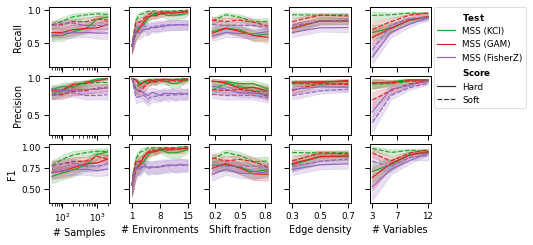

In [6]:
# sns.set_context('paper')

fig, axes = plt.subplots(
    len(metrics),
    len(grid_vars),
    sharey='row', sharex='col',
    figsize=(1.5*len(grid_vars), 3.5)
)

for row, metric in zip(axes, metrics):
# for row, metric in zip(axes, ['Recall', 'Precision', 'Average precision']):
    for g_var, (lb, ub), ax in zip(grid_vars, indices, row):
        plot_df_ax = plot_df[
                (plot_df['params_index'] >= lb)
                & (plot_df['params_index'] < ub)
                & (plot_df[r'$\bf{Test}$'].isin(['MSS (KCI)', 'MSS (GAM)', 'MSS (FisherZ)']))#, 'MC']))
        ]
        
        if g_var != '# Environments':
            plot_df_ax = plot_df_ax[
                # IMPORTANT! otherwise average over all number of environments
                plot_df_ax['# Environments'] == plot_df_ax['# Environments'].max()
            ]
        
        sns.lineplot(
            data=plot_df_ax,
            x=g_var,
            y=metric,
            hue=r'$\bf{Test}$',
            style=r'$\bf{Score}$',
            ax=ax,
            palette=[
                sns.color_palette("tab10")[i]
                for i in [2, 3, 4]
            ],
            legend='full',
            style_order=['Hard', 'Soft'],
        )
        
        xmin = plot_df_ax[g_var].min()
        xmax = plot_df_ax[g_var].max()
        if xmax > 1:
            ax.set_xticks([
                xmin,
                int(xmin + (xmax - xmin) / 2),
                xmax,
            ])
        else:
            ax.set_xticks([
                np.round(xmin, 1),
                np.round(xmin + (xmax - xmin) / 2 , 1),
                np.round(xmax, 1),
            ])
        
leg_idx = 4
axes = np.concatenate(axes)
for i in range(len(axes)):
    if i == 0:
        axes[i].set_xscale('log')
    if i == leg_idx:
        axes[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        axes[i].get_legend().remove()

plt.tight_layout()
plt.subplots_adjust(hspace=0.15)
if SAVE_FIGURES:
    plt.savefig(f'./figures/empirical_select_rates_er_ours.pdf')
plt.show()